In [3]:
!pip install pandas
!pip install xlrd
!pip install sklearn
!pip install imblearn

In [1]:
import xlrd
book = xlrd.open_workbook("Datasheets info.xlsx")
sheetMQ2 = book.sheet_by_name("MQ2 - Pololulu")
sheetMQ3 = book.sheet_by_name("MQ3 - Sparkfun")
sheetMQ4 = book.sheet_by_name("MQ4 - Sparkfun")
sheetMQ5 = book.sheet_by_name("MQ5 - Sparkfun")
sheetMQ6 = book.sheet_by_name("MQ6 - Sparkfun")
sheetMQ7 = book.sheet_by_name("MQ7 - Sparkfun")
sheetMQ8 = book.sheet_by_name("MQ8 - Sparkfun")
sheetMQ9 = book.sheet_by_name("MQ9 - Haoyuelectronics")
sheetMQ131 = book.sheet_by_name("MQ131- Sensorsportal")
sheetMQ135 = book.sheet_by_name("MQ135 - HANWEI")
sheetMQ303A = book.sheet_by_name("MQ303A - HANWEI")
sheetMQ309A = book.sheet_by_name("MQ309A - HANWEI")

In [5]:
for row_index in range(1,20): #reading first columns
    RsR0, CO2, CO, Alcohol, NH4, Tolueno, Acetona = sheetMQ135.row_values(row_index, start_colx=0, end_colx=7)
    print(RsR0, "	", CO2, "	", CO, "	", Alcohol, "	", NH4, "	", Tolueno, "	", Acetona)
 

0.1 	  	  	  	  	  	 
0.2 	  	  	  	  	  	 
0.3 	  	  	  	  	  	 
0.4 	  	  	  	  	  	 
0.5 	  	  	  	  	  	 
0.6 	  	  	  	  	 200.0 	 200.0
0.7 	  	  	 200.0 	  	  	 100.0
0.8 	 200.0 	  	  	 200.0 	 100.0 	 
0.9 	  	  	 100.0 	  	  	 
1.0 	 100.0 	 200.0 	  	 100.0 	 10.0 	 10.0
2.0 	 10.0 	  	 10.0 	  	  	 
3.0 	  	 10.0 	  	 10.0 	  	 
4.0 	  	  	  	  	  	 
5.0 	  	  	  	  	  	 
6.0 	  	  	  	  	  	 
7.0 	  	  	  	  	  	 
8.0 	  	  	  	  	  	 
9.0 	  	  	  	  	  	 
10.0 	  	  	  	  	  	 


In [32]:
x_MQ135 = sheetMQ135.col_values(0)[2:]
MQ135_CO2 = sheetMQ135.col_values(1)[2:]
MQ135_CO = sheetMQ135.col_values(2)[2:]
MQ135_Alcohol = sheetMQ135.col_values(3)[2:]
MQ135_NH4 = sheetMQ135.col_values(4)[2:]
MQ135_Tolueno = sheetMQ135.col_values(5)[2:]
MQ135_Acetona = sheetMQ135.col_values(6)[2:]

In [33]:
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

In [34]:
MQ135_CO2 =zero_to_nan(MQ135_CO2)
MQ135_CO =zero_to_nan(MQ135_CO)
MQ135_Alcohol =zero_to_nan(MQ135_Alcohol)
MQ135_NH4 =zero_to_nan(MQ135_NH4)
MQ135_Tolueno =zero_to_nan(MQ135_Tolueno)
MQ135_Acetona =zero_to_nan(MQ135_Acetona)

In [35]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import linear_model

dataCO2 = {'RsRo': x_MQ135, 'CO2': MQ135_CO2}
dataCO = {'RsRo': x_MQ135, 'CO': MQ135_CO}
dataAlcohol = {'RsRo': x_MQ135, 'Alcohol': MQ135_Alcohol}
dataNH4 = {'RsRo': x_MQ135, 'NH4': MQ135_NH4}
dataTolueno = {'RsRo': x_MQ135, 'Tolueno': MQ135_Tolueno}
dataAcetona = {'RsRo': x_MQ135, 'Acetona': MQ135_Acetona}

dfMQ135_CO2 = pd.DataFrame(dataCO2)
dfMQ135_CO = pd.DataFrame(dataCO)
dfMQ135_Alcohol = pd.DataFrame(dataAlcohol)
dfMQ135_NH4 = pd.DataFrame(dataNH4)
dfMQ135_Tolueno = pd.DataFrame(dataTolueno)
dfMQ135_Acetona = pd.DataFrame(dataAcetona)

dfMQ135_CO2['CO2'] = pd.to_numeric(dfMQ135_CO2['CO2'])
dfMQ135_CO['CO'] = pd.to_numeric(dfMQ135_CO['CO'])
dfMQ135_Alcohol['Alcohol'] = pd.to_numeric(dfMQ135_Alcohol['Alcohol'])
dfMQ135_NH4['NH4'] = pd.to_numeric(dfMQ135_NH4['NH4'])
dfMQ135_Tolueno['Tolueno'] = pd.to_numeric(dfMQ135_Tolueno['Tolueno'])
dfMQ135_Acetona['Acetona'] = pd.to_numeric(dfMQ135_Acetona['Acetona'])

dfMQ135_CO2['CO2'] = dfMQ135_CO2['CO2'].replace('',None, regex=True)
dfMQ135_CO['CO'] = dfMQ135_CO['CO'].replace('',None, regex=True)
dfMQ135_Alcohol['Alcohol'] = dfMQ135_Alcohol['Alcohol'].replace('',None, regex=True)
dfMQ135_NH4['NH4'] = dfMQ135_NH4['NH4'].replace('',None, regex=True)
dfMQ135_Tolueno['Tolueno'] = dfMQ135_Tolueno['Tolueno'].replace('',None, regex=True)
dfMQ135_Acetona['Acetona'] = dfMQ135_Acetona['Acetona'].replace('',None, regex=True)

#Global X_Predict variable
X_Predict = dfMQ135_CO2.RsRo.apply(lambda x: [x]).tolist()

In [36]:
#Model and train CO2
dataset2TrainCO2 = dfMQ135_CO2.copy()
dataset2TrainCO2.dropna(inplace=True)
X_trainCO2 = dataset2TrainCO2.RsRo.apply(lambda x: [x]).tolist()
y_trainCO2 = dataset2TrainCO2['CO2'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCO2, y_trainCO2)
#Predict
CO2_Predicted = model.predict(X_Predict)
#save into MQ2
MQ135_CO2 = CO2_Predicted

In [37]:
#Model and train CO
dataset2TrainCO = dfMQ135_CO.copy()
dataset2TrainCO.dropna(inplace=True)
X_trainCO = dataset2TrainCO.RsRo.apply(lambda x: [x]).tolist()
y_trainCO = dataset2TrainCO['CO'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCO, y_trainCO)
#Predict
CO_Predicted = model.predict(X_Predict)
#save into MQ2
MQ135_CO = CO_Predicted

In [38]:
#Model and train Alcohol
dataset2TrainAlcohol = dfMQ135_Alcohol.copy()
dataset2TrainAlcohol.dropna(inplace=True)
X_trainAlcohol = dataset2TrainAlcohol.RsRo.apply(lambda x: [x]).tolist()
y_trainAlcohol = dataset2TrainAlcohol['Alcohol'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainAlcohol, y_trainAlcohol)
#Predict
Alcohol_Predicted = model.predict(X_Predict)
#save into MQ2
MQ135_Alcohol = Alcohol_Predicted

In [39]:
#Model and train NH4
dataset2TrainNH4 = dfMQ135_NH4.copy()
dataset2TrainNH4.dropna(inplace=True)
X_trainNH4 = dataset2TrainNH4.RsRo.apply(lambda x: [x]).tolist()
y_trainNH4 = dataset2TrainNH4['NH4'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainNH4, y_trainNH4)
#Predict
NH4_Predicted = model.predict(X_Predict)
#save into MQ2
MQ135_NH4 = NH4_Predicted

In [41]:
#Model and train Tolueno
dataset2TrainTolueno = dfMQ135_Tolueno.copy()
dataset2TrainTolueno.dropna(inplace=True)
X_trainTolueno = dataset2TrainTolueno.RsRo.apply(lambda x: [x]).tolist()
y_trainTolueno = dataset2TrainTolueno['Tolueno'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainTolueno, y_trainTolueno)
#Predict
Tolueno_Predicted = model.predict(X_Predict)
#save into MQ2
MQ135_Tolueno = Tolueno_Predicted

In [44]:
#Model and train Acetona
dataset2TrainAcetona = dfMQ135_Acetona.copy()
dataset2TrainAcetona.dropna(inplace=True)
X_trainAcetona = dataset2TrainAcetona.RsRo.apply(lambda x: [x]).tolist()
y_trainAcetona = dataset2TrainAcetona['Acetona'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainAcetona, y_trainAcetona)
#Predict
Acetona_Predicted = model.predict(X_Predict)
#save into MQ2
MQ135_Acetona = Acetona_Predicted

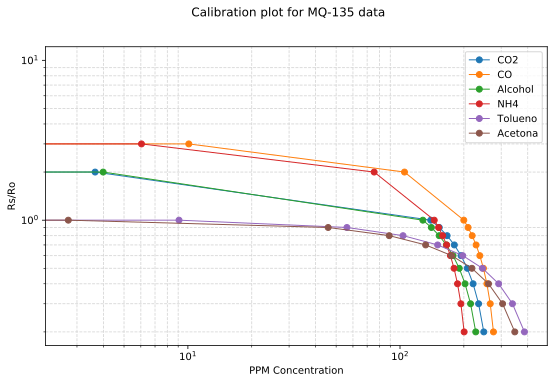

In [45]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves
plt.plot(MQ135_CO2, x_MQ135, marker='o', linewidth=1, label='CO2')
plt.plot(MQ135_CO, x_MQ135, marker='o', linewidth=1, label='CO')
plt.plot(MQ135_Alcohol, x_MQ135, marker='o', linewidth=1, label='Alcohol')
plt.plot(MQ135_NH4, x_MQ135, marker='o', linewidth=1, label='NH4')
plt.plot(MQ135_Tolueno, x_MQ135, marker='o', linewidth=1, label='Tolueno')
plt.plot(MQ135_Acetona, x_MQ135, marker='o', linewidth=1, label='Acetona')

# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

fig.suptitle('Calibration plot for MQ-135 data')
ax.set_xlabel('PPM Concentration')
ax.set_ylabel('Rs/Ro')


#Save image
plt.savefig('MQ135.svg', format = 'svg', dpi = 1200)
plt.savefig('MQ135.png')
plt.savefig('MQ135.eps', format = 'eps', dpi = 1200)